 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csvpath = Path("../Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum() 

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csvpath = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500csvpath = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace(",", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

sp500_history_df.head()

C:\Users\jonat\AppData\Local\Temp/ipykernel_27832/1549240615.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_dr_df = sp500_history_df.pct_change()
sp500_dr_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_dr_df = sp500_dr_df.dropna()
sp500_dr_df.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dr_df = sp500_dr_df.rename(columns = {"Close": "S&P 500"})
sp500_dr_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df = pd.concat([whale_df, algo_returns_df, sp500_dr_df], axis = "columns", join = "inner")
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all Portfolios'}, xlabel='Date'>

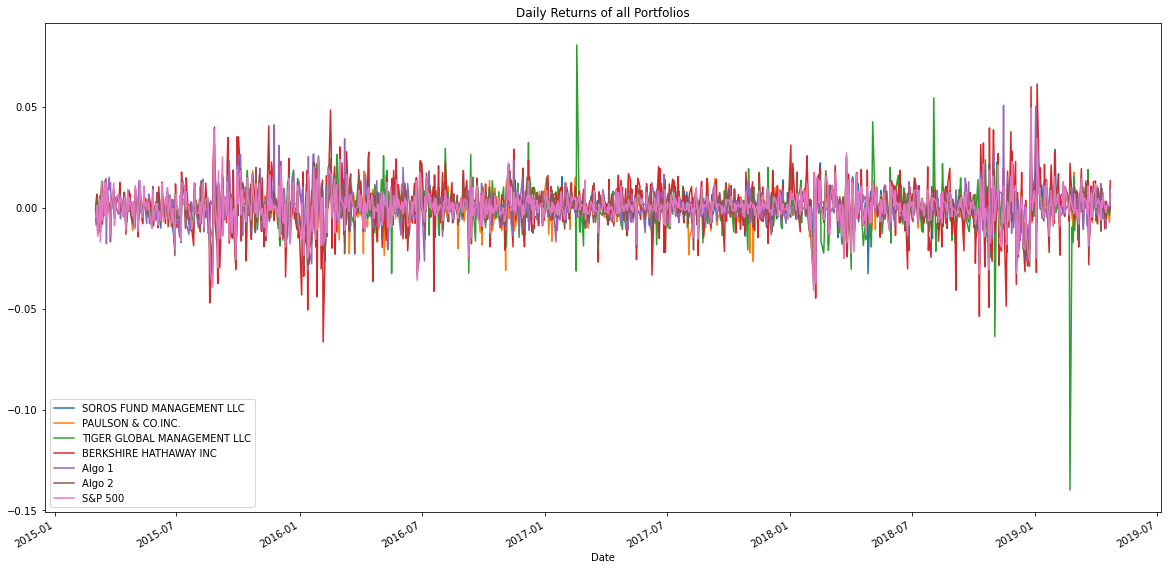

In [15]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot(figsize = (20,10), title = "Daily Returns of all Portfolios")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

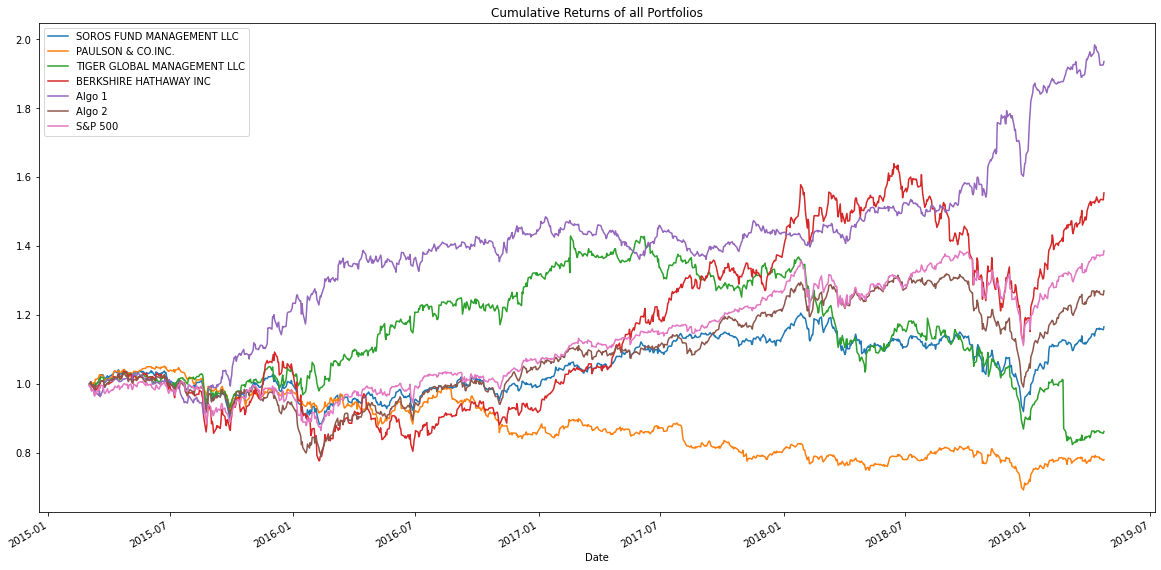

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_portfolios_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10), title = "Cumulative Returns of all Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk of all Portfolios'}>

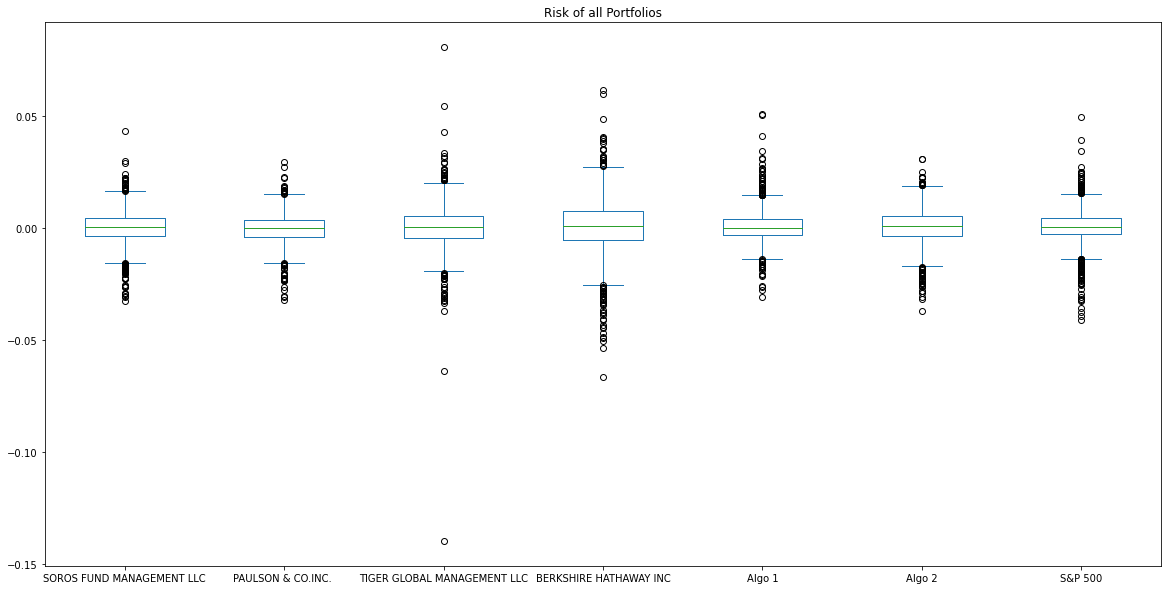

In [17]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(figsize = (20,10), title = "Risk of all Portfolios")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_portfolios_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_portfolios_df["S&P 500"].std()
# Determine which portfolios are riskier than the S&P 500
combined_portfolios_df.std()>sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_portfolios_df.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation of Portolios in 21-day Window'}, xlabel='Date'>

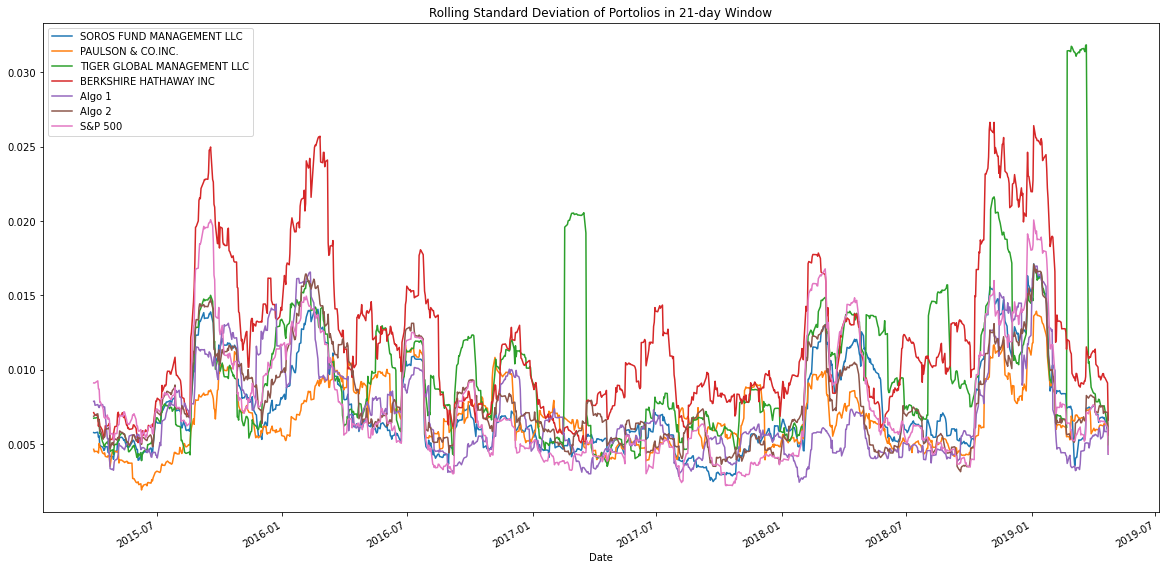

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_portfolios_df.rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize = (20, 10), title = "Rolling Standard Deviation of Portolios in 21-day Window")

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation of Portfolios'}>

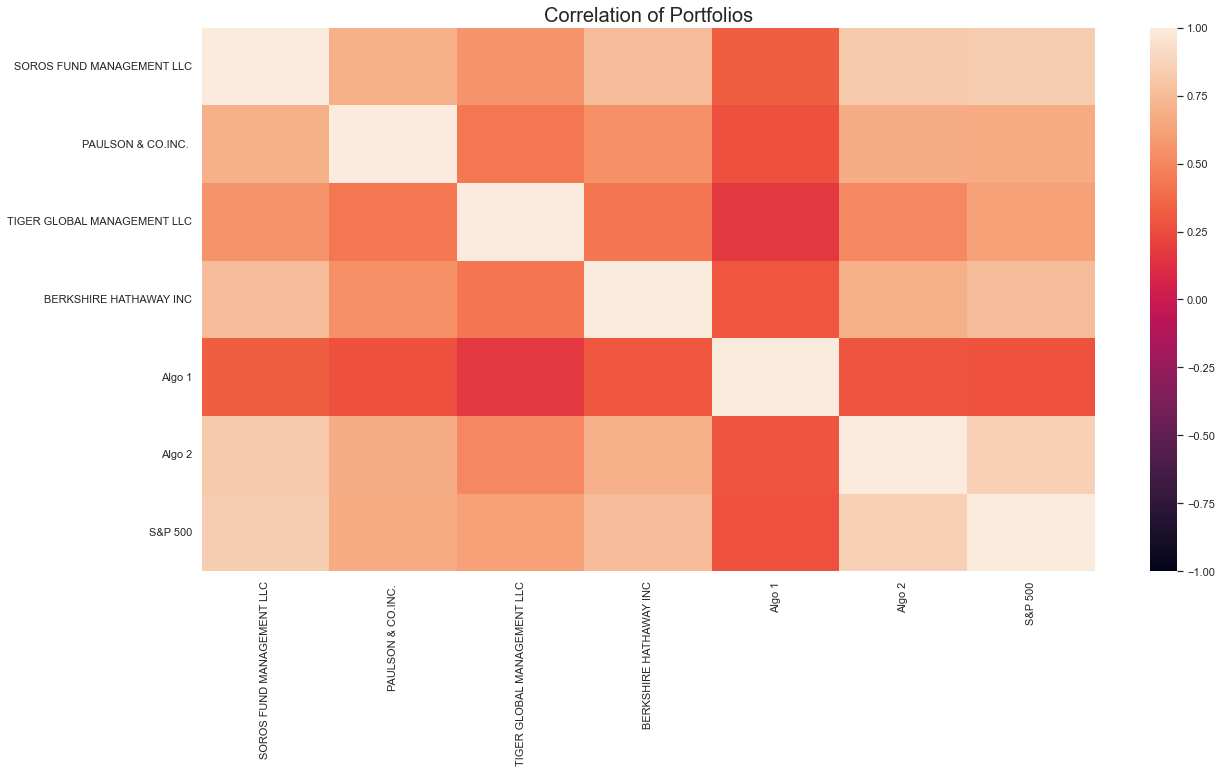

In [22]:
# Calculate the correlation
correlation = combined_portfolios_df.corr()
# Display de correlation matrix
sns.set(rc = {'figure.figsize':(20,10)})
plt.title("Correlation of Portfolios", fontsize = 20)
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

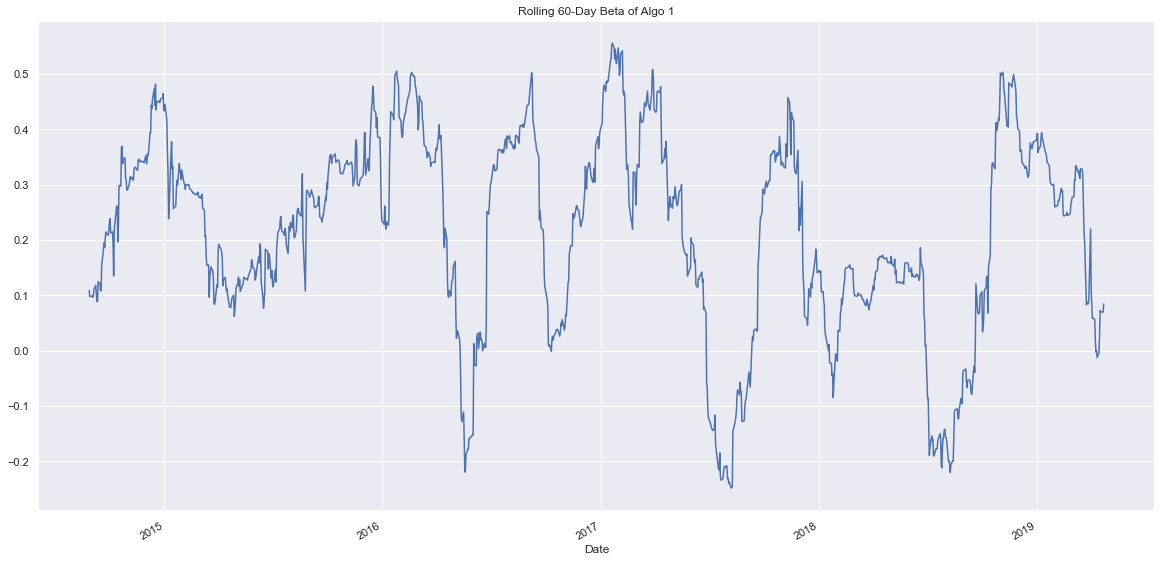

In [23]:
# Calculate covariance of a single portfolio
# Combine Algo and SP500 dataframes
algo_sp500_combined_df = pd.concat([algo_returns_df, sp500_dr_df], axis='columns', join='inner')
algo_sp500_combined_df.head()

# Covariance of Algo Portfolio
covariance_algo = algo_sp500_combined_df['Algo 1'].cov(algo_sp500_combined_df['S&P 500'])

# Calculate variance of S&P 500
variance = algo_sp500_combined_df['S&P 500'].var()

# Computing beta
algo1_beta = covariance_algo / variance
algo1_beta
# Plot beta trend
rolling_covariance = algo_sp500_combined_df['Algo 1'].rolling(window=60).cov(algo_sp500_combined_df['S&P 500'])
rolling_variance = algo_sp500_combined_df['S&P 500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [24]:
# Use `ewm` to calculate the rolling window
combined_portfolios_df.ewm(halflife=21).mean()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

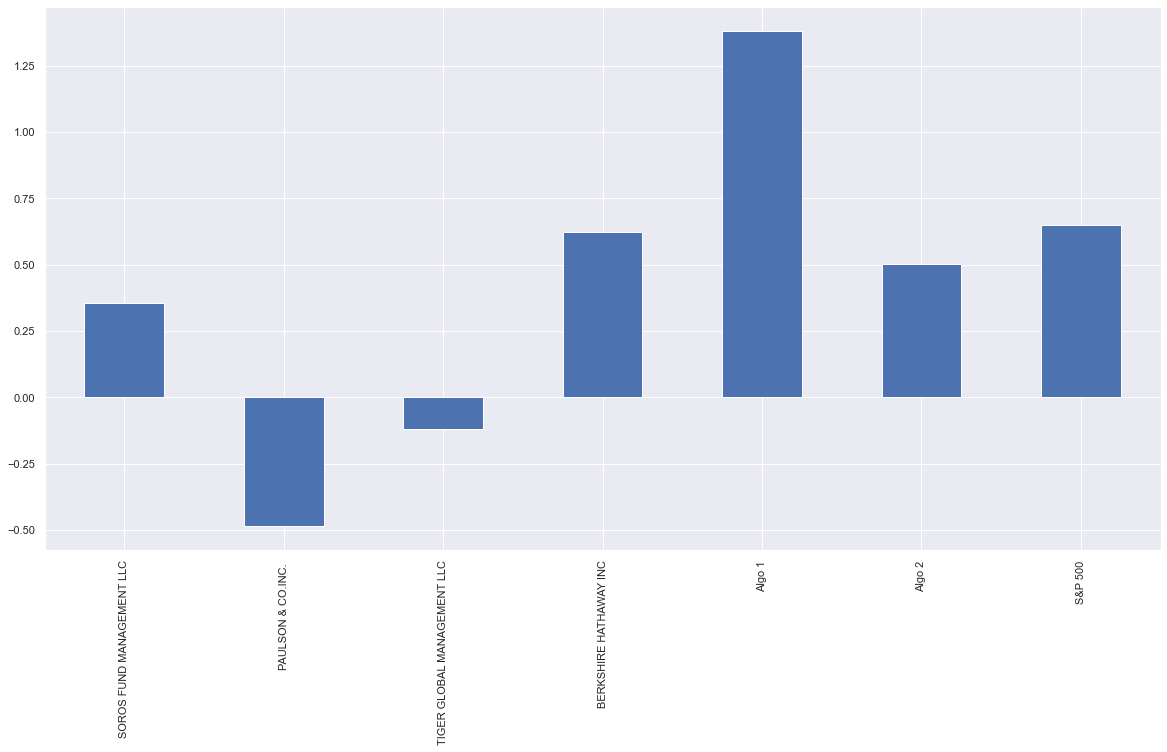

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

In [27]:
#Algo 1 outperforms both the whale portfolios and the S&P 500 but Algo 2 outperforms all of the portfolios except for the S&P 500 and the Berkshire Hathaway Inc portolio of the whales portfolios.

Algo 1 outperforms both the whale portfolios and the S&P 500 but Algo 2 outperforms all of the portfolios except for the S&P 500 and the Berkshire Hathaway Inc portolio of the whales portfolios.


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
aal_csvpath = Path("../Starter_Code/Resources/aal_google_finance.csv")
aal_df = pd.read_csv(aal_csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
aal_df = aal_df.rename(columns = {"Close": "AAL"})
aal_df.head()

,AAL
Date,
2017-01-03,46.30
2017-01-04,46.70
2017-01-05,45.89
2017-01-06,46.21
2017-01-09,47.08


In [29]:
# Reading data from 2nd stock
dal_csvpath = Path("../Starter_Code/Resources/dal_google_finance.csv")
dal_df = pd.read_csv(dal_csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
dal_df = dal_df.rename(columns = {"Close": "DAL"})
dal_df.head()

,DAL
Date,
2017-01-03,49.48
2017-01-04,50.70
2017-01-05,49.73
2017-01-06,49.68
2017-01-09,49.69


In [30]:
# Reading data from 3rd stock
luv_csvpath = Path("../Starter_Code/Resources/luv_google_finance.csv")
luv_df = pd.read_csv(aal_csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)
luv_df = luv_df.rename(columns = {"Close": "LUV"})
luv_df.head()

,LUV
Date,
2017-01-03,46.30
2017-01-04,46.70
2017-01-05,45.89
2017-01-06,46.21
2017-01-09,47.08


In [31]:
# Combine all stocks in a single DataFrame
airlines_df = pd.concat([aal_df, dal_df, luv_df], axis = "columns", join = "inner")
airlines_df.head()

,AAL,DAL,LUV
Date,,,
2017-01-03,46.30,49.48,46.30
2017-01-04,46.70,50.70,46.70
2017-01-05,45.89,49.73,45.89
2017-01-06,46.21,49.68,46.21
2017-01-09,47.08,49.69,47.08


In [32]:
# Reset Date index


In [33]:
# Reorganize portfolio data by having a column per symbol
# This was done already when the CSV files were read

In [34]:
# Calculate daily returns
airlines_df = airlines_df.pct_change()

# Drop NAs
airlines_df = airlines_df.dropna()


# Display sample data
airlines_df.head()

,AAL,DAL,LUV
Date,,,
2017-01-04,0.008639,0.024656,0.008639
2017-01-05,-0.017345,-0.019132,-0.017345
2017-01-06,0.006973,-0.001005,0.006973
2017-01-09,0.018827,0.000201,0.018827
2017-01-10,0.029737,0.024955,0.029737


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
jon_portfolio_returns = airlines_df.dot(weights)
# Display sample data
jon_portfolio_returns.head()

Date
2017-01-04    0.013978
2017-01-05   -0.017941
2017-01-06    0.004314
2017-01-09    0.012618
2017-01-10    0.028143
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [54]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([jon_porfolio_returns, combined_portfolios_df], axis='columns', join='inner')
all_returns.columns=['Jon Portfolio', 'Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo 1', 'Algo 2', 'S&P 500']
all_returns

,Jon Portfolio,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2017-01-04,0.013978,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.005722
2017-01-05,-0.017941,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.000771
2017-01-06,0.004314,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003517
2017-01-09,0.012618,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.003549
2017-01-10,0.028143,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,0.000000
...,...,...,...,...,...,...,...,...
2019-04-16,0.009360,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.008692,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,-0.001677,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [55]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull().sum()

Jon Portfolio    0
Soros            0
Paulson          0
Tiger            0
Berkshire        0
Algo 1           0
Algo 2           0
S&P 500          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [56]:
# Calculate the annualized `std`
all_returns_annualized_std = all_returns.std() * np.sqrt(252)
all_returns_annualized_std

Jon Portfolio    0.307565
Soros            0.124795
Paulson          0.107732
Tiger            0.188647
Berkshire        0.198369
Algo 1           0.106695
Algo 2           0.120169
S&P 500          0.129174
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

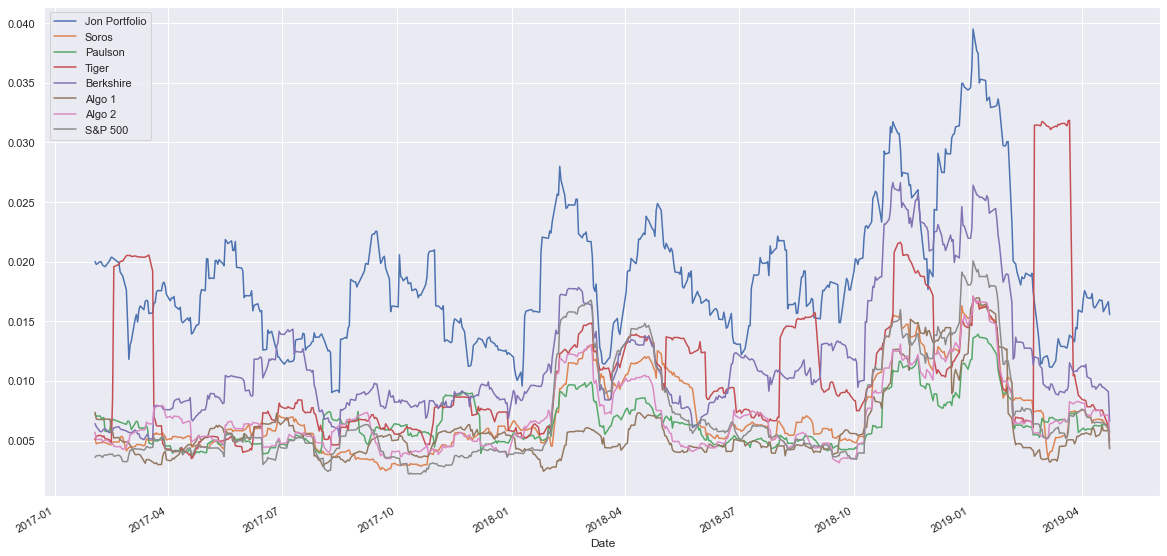

In [58]:
# Calculate rolling standard deviation
all_returns.rolling(window=21).std().plot()
# Plot rolling standard deviation


### Calculate and plot the correlation

In [60]:
# Calculate and plot the correlation
all_returns_correlation = all_returns.corr()
all_returns_correlation.style.background_gradient(cmap="coolwarm")

,Jon Portfolio,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Jon Portfolio,1.000000,0.492277,0.419169,0.292519,0.479602,0.131781,0.532709,0.541994
Soros,0.492277,1.000000,0.686080,0.485794,0.761123,0.279254,0.797112,0.811876
Paulson,0.419169,0.686080,1.000000,0.419360,0.565238,0.285009,0.718771,0.694322
Tiger,0.292519,0.485794,0.419360,1.000000,0.344809,0.090185,0.430232,0.525047
Berkshire,0.479602,0.761123,0.565238,0.344809,1.000000,0.240730,0.737636,0.798178
Algo 1,0.131781,0.279254,0.285009,0.090185,0.240730,1.000000,0.296016,0.248901
Algo 2,0.532709,0.797112,0.718771,0.430232,0.737636,0.296016,1.000000,0.864434
S&P 500,0.541994,0.811876,0.694322,0.525047,0.798178,0.248901,0.864434,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Jon Portfolio'}, xlabel='Date'>

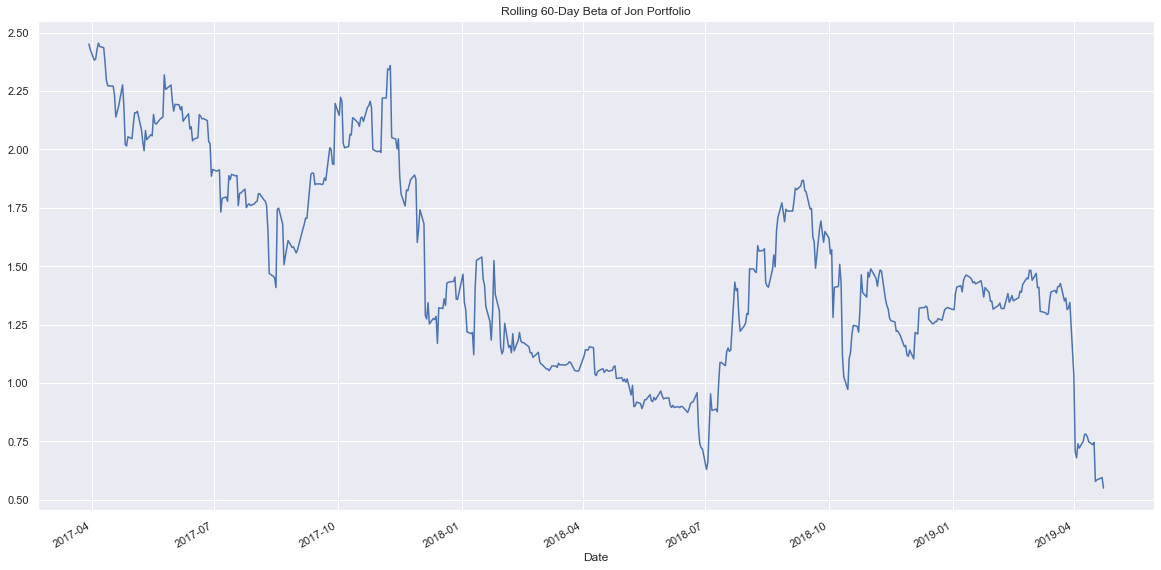

In [61]:
# Calculate and plot Beta
covariance_jon_portfolio = all_returns['Jon Portfolio'].cov(all_returns['S&P 500'])

# Calculate variance of S&P 500
variance = all_returns['S&P 500'].var()

# Computing beta
jon_portfolio_beta = covariance_jon_portfolio / variance
jon_portfolio_beta
# Plot beta trend
rolling_covariance_jon = all_returns['Jon Portfolio'].rolling(window=60).cov(all_returns['S&P 500'])
rolling_variance_jon = all_returns['S&P 500'].rolling(window=60).var()
rolling_beta_jon = rolling_covariance_jon / rolling_variance_jon
rolling_beta_jon.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Jon Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [62]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_all = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios_all

Jon Portfolio   -0.044291
Soros            0.614773
Paulson         -0.404520
Tiger           -0.888148
Berkshire        1.242706
Algo 1           1.223376
Algo 2           0.747427
S&P 500          0.948652
dtype: float64

<AxesSubplot:>

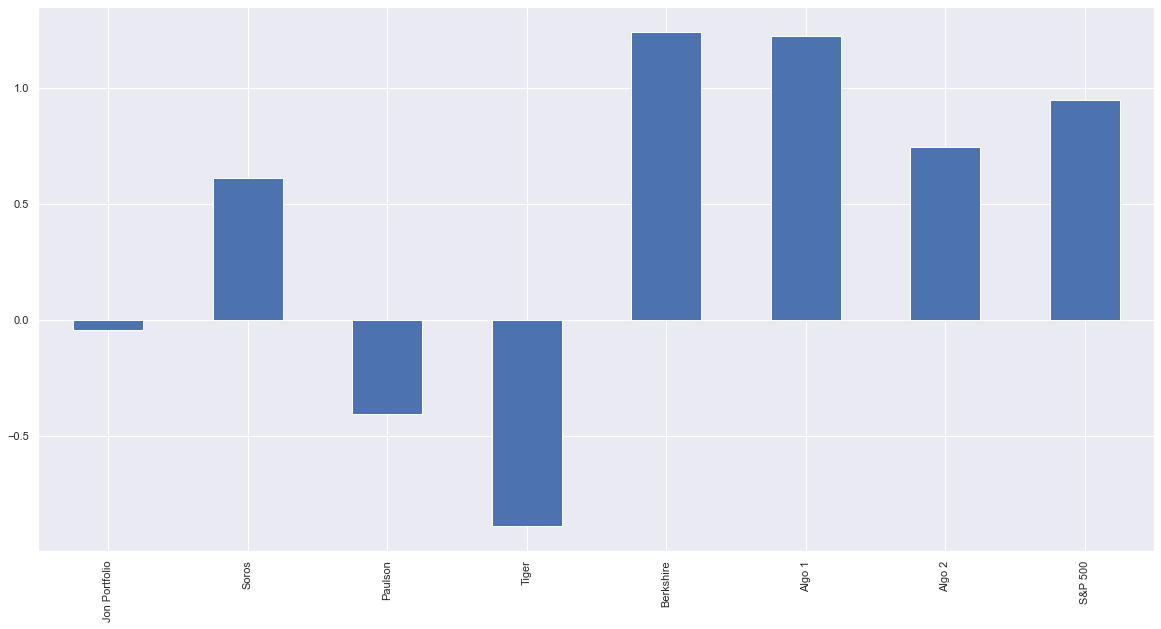

In [63]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [ ]:
# My custom portfolio of LUV, AAL, and DAL was much more volatile than the other portfolios based upon the 21-week rolling standard diviation. The covariance was very strong initially and diminished over time, but it stayed positive the entire time showing that it was still closely tied to the S&P 500's performance. The risk vs. reward of my portfolio was nearly zero as shown by the Sharpe Ratio meanting that there was much more favorable risk vs. reward portfolios such as Berkshire, Algo 1 and the S&P 500.